In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers.legacy import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\adiva\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [4]:
import scipy

In [5]:
train = ImageDataGenerator(rescale=1/255, rotation_range=40)

In [6]:
train_dataset = train.flow_from_directory('basedata/train/', 
                                           target_size=(200,200), 
                                           batch_size=3,
                                           color_mode='rgb'
                                          )

Found 2626 images belonging to 39 classes.


In [7]:
train_dataset.class_indices

{'adho_mukha_svanasana': 0,
 'adho_mukha_vrksasana': 1,
 'alanasana': 2,
 'anjaneyasana': 3,
 'ardha_chandrasana': 4,
 'ardha_matsyendrasana': 5,
 'ardha_pincha_mayurasana': 6,
 'baddha_konasana': 7,
 'bakasana': 8,
 'balasana': 9,
 'bitilasana': 10,
 'camatkarasana': 11,
 'dhanurasana': 12,
 'eka_pada_rajakapotasana': 13,
 'garudasana': 14,
 'halasana': 15,
 'hanumanasana': 16,
 'malasana': 17,
 'marjaryasana': 18,
 'padmasana': 19,
 'parsvottanasana': 20,
 'paschimottanasana': 21,
 'phalakasana': 22,
 'pincha_mayurasana': 23,
 'salamba_bhujangasana': 24,
 'salamba_sarvangasana': 25,
 'setu_bandha_sarvangasana': 26,
 'urdhva_dhanurasana': 27,
 'urdhva_mukha_svsnssana': 28,
 'ustrasana': 29,
 'utkatasana': 30,
 'uttanasana': 31,
 'utthita_hasta_padangusthasana': 32,
 'utthita_parsvakonasana': 33,
 'vasisthasana': 34,
 'virabhadrasana_one': 35,
 'virabhadrasana_three': 36,
 'virabhadrasana_two': 37,
 'vrksasana': 38}

In [8]:
yoga_pose = {
 0: 'ADHO MUKHA SVANASANA',
 1: 'ADHO MUKHA VRKSASANA',
 2: 'ALANASANA',
 3: 'ANJANEYASANA',
 4: 'ARDHA CHANDRASANA',
 5: 'ARDHA MATSYENDRASANA',
 6: 'ARDHA PINCHA MAYURASANA',
 7: 'BADDHA KONASANA',
 8: 'BAKASANA',
 9: 'BALASANA',
 10: 'BITILASANA',
 11: 'CAMATKARASANA',
 12: 'DHANURASANA',
 13: 'EKA PADA RAJAKAPOTASANA',
 14: 'GARUDASANA',
 15: 'HALASANA',
 16: 'HANUMANASANA',
 17: 'MALASANA',
 18: 'MARJARYASANA',
 19: 'PADMASANA',
 20: 'PARSVOTTANASANA',
 21: 'PASCHIMOTTANASANA',
 22: 'PHALAKASANA',
 23: 'PINCHA MAYURASANA',
 24: 'SALAMBA BHUJANGASANA',
 25: 'SALAMBA SARVANGASANA',
 26: 'SETU BANDHA SARVANGASANA',
 27: 'URDHVA DHANURASANA',
 28: 'URDHVA MUKHA SVSNSSANA',
 29: 'USTRASANA',
 30: 'UTKATASANA',
 31: 'UTTANASANA',
 32: 'UTTHITA HASTA PADANGUSTHASANA',
 33: 'UTTHITA PARSVAKONASANA',
 34: 'VASISTHASANA',
 35: 'VIRABHADRASANA ONE',
 36: 'VIRABHADRASANA THREE',
 37: 'VIRABHADRASANA TWO',
 38: 'VRKSASANA'
}


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(39, activation='softmax')
])

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model_fit = model.fit(train_dataset, epochs=25)

Epoch 1/25
719/876 [=======================>......] - ETA: 25s - loss: 3.7691 - accuracy: 0.0529

C:\Users\adiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


876/876 [==============================] - 140s 159ms/step - loss: 3.7002 - accuracy: 0.0651
Epoch 2/25
876/876 [==============================] - 126s 144ms/step - loss: 2.9177 - accuracy: 0.2498
Epoch 3/25
876/876 [==============================] - 127s 144ms/step - loss: 2.3608 - accuracy: 0.3903
Epoch 4/25
876/876 [==============================] - 128s 146ms/step - loss: 1.9504 - accuracy: 0.4851
Epoch 5/25
876/876 [==============================] - 126s 144ms/step - loss: 1.6378 - accuracy: 0.5777
Epoch 6/25
876/876 [==============================] - 126s 144ms/step - loss: 1.3854 - accuracy: 0.6478
Epoch 7/25
876/876 [==============================] - 126s 143ms/step - loss: 1.2642 - accuracy: 0.6687
Epoch 8/25
876/876 [==============================] - 127s 145ms/step - loss: 1.0915 - accuracy: 0.7262
Epoch 9/25
876/876 [==============================] - 127s 144ms/step - loss: 0.9515 - accuracy: 0.7525
Epoch 10/25
876/876 [==============================] - 126s 144ms/step - lo

In [14]:
model.save("yoga_neural_network_updated_with_regulizer")

INFO:tensorflow:Assets written to: yoga_neural_network_updated_with_regulizer\assets


INFO:tensorflow:Assets written to: yoga_neural_network_updated_with_regulizer\assets


In [11]:
yoga_model = tf.keras.models.load_model('yoga_neural_network/')

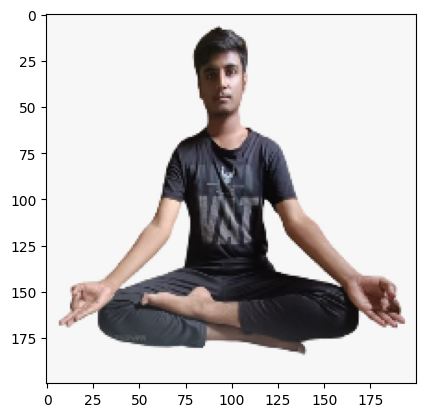

1/1 [==============================] - 0s 225ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is PADMASANA


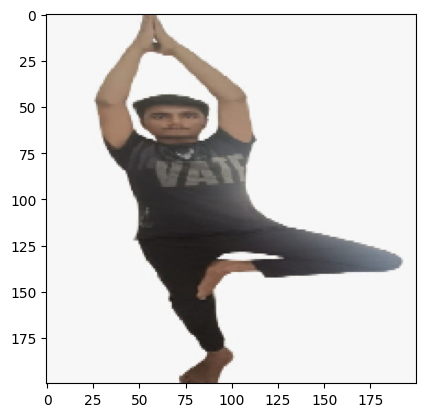

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is UTKATASANA


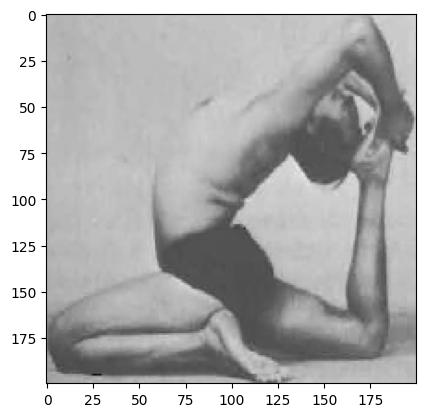

1/1 [==============================] - 0s 25ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is ALANASANA


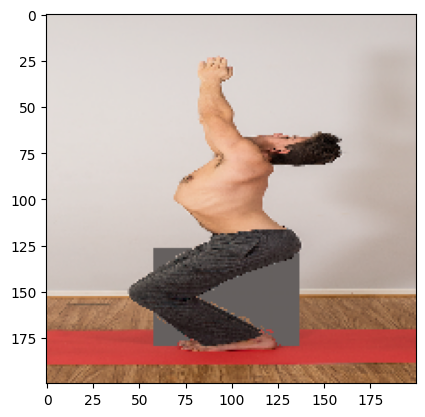

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is UTKATASANA


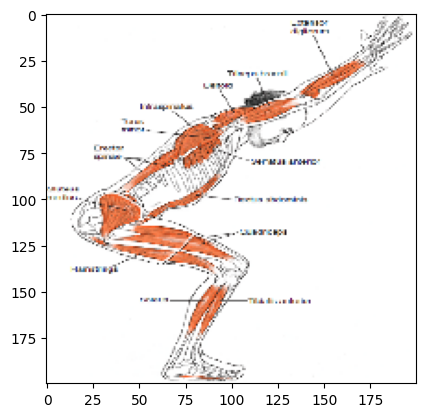

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is UTKATASANA


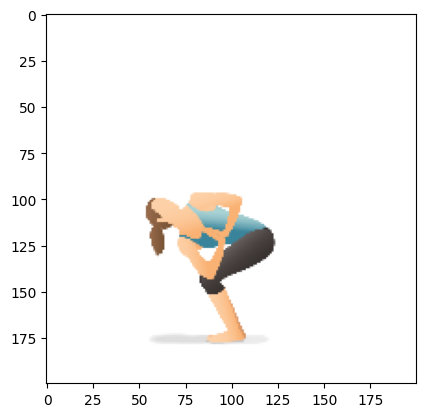

1/1 [==============================] - 0s 27ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is UTKATASANA


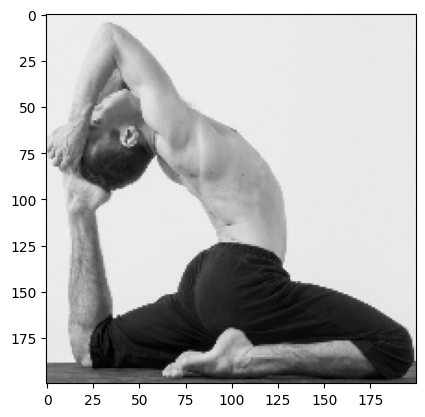

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is PADMASANA


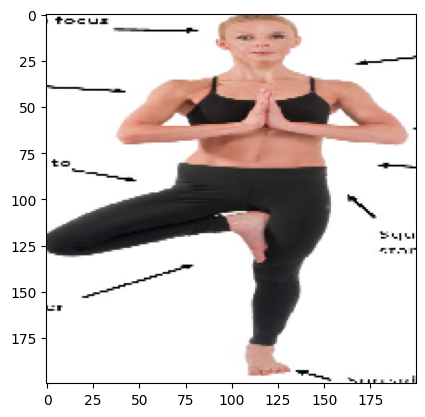

1/1 [==============================] - 0s 26ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
the pose is VRKSASANA


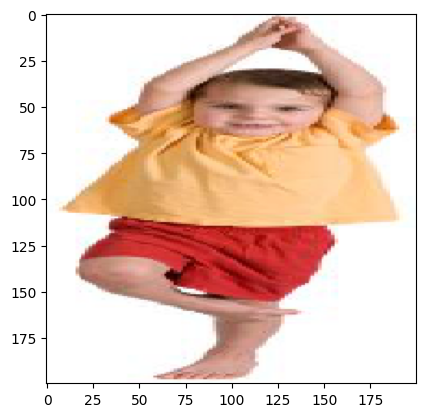

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
the pose is VRKSASANA


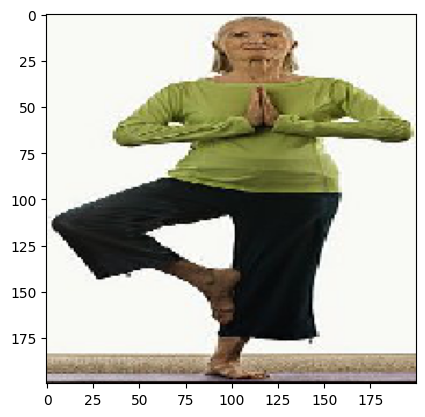

1/1 [==============================] - 0s 23ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
the pose is VRKSASANA


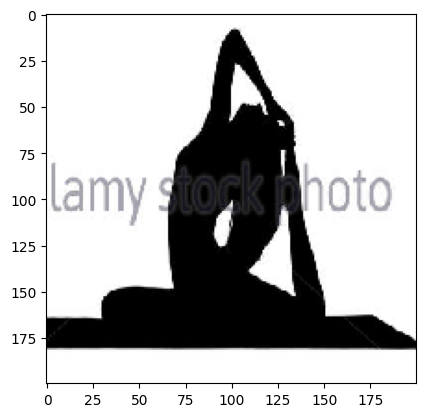

1/1 [==============================] - 0s 23ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is EKA PADA RAJAKAPOTASANA


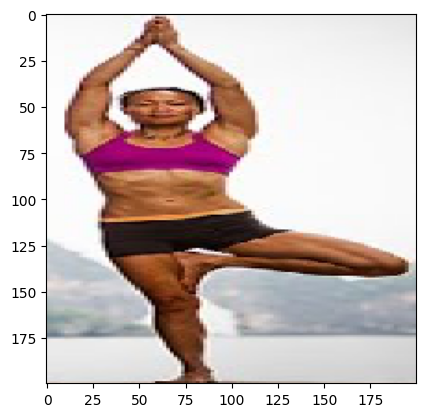

1/1 [==============================] - 0s 26ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
the pose is VRKSASANA


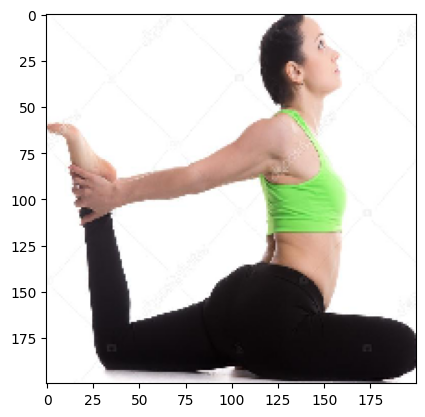

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is EKA PADA RAJAKAPOTASANA


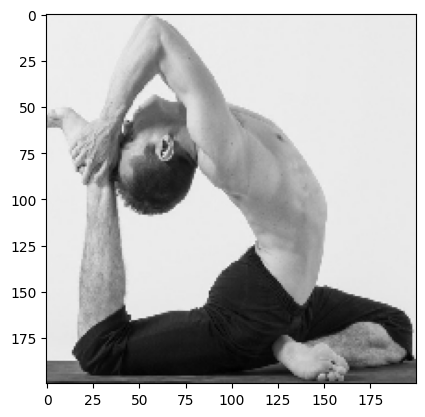

1/1 [==============================] - 0s 24ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is EKA PADA RAJAKAPOTASANA


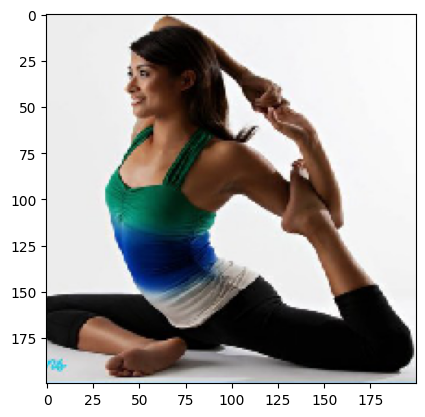

1/1 [==============================] - 0s 23ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is EKA PADA RAJAKAPOTASANA


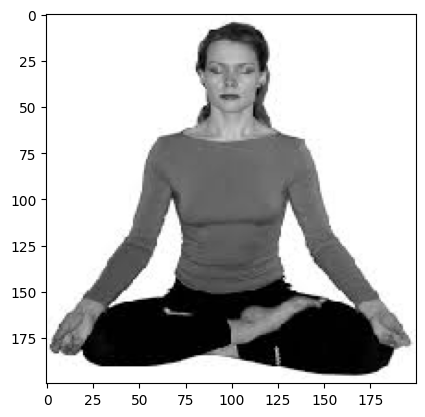

1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is PADMASANA


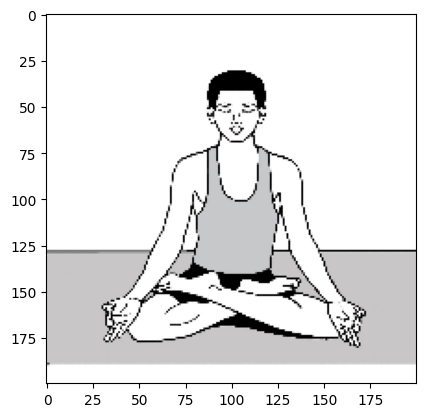

1/1 [==============================] - 0s 24ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is PADMASANA


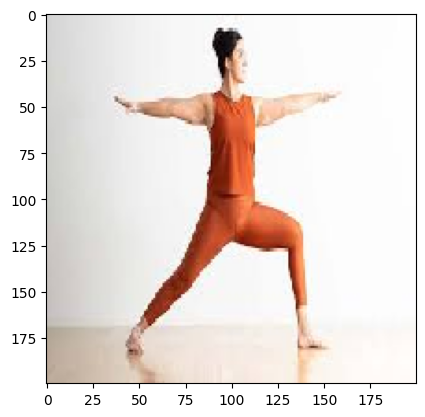

1/1 [==============================] - 0s 23ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
the pose is VIRABHADRASANA TWO


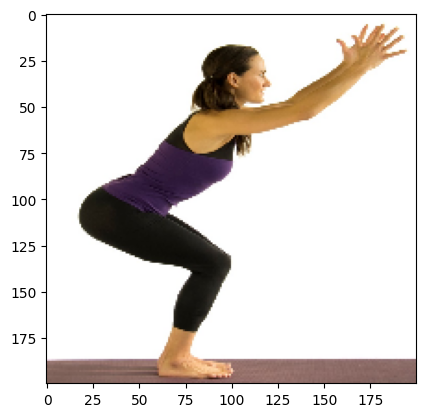

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
the pose is UTKATASANA


In [12]:
dir_path = 'basedata/test/'

for i in os.listdir(dir_path):
    if (i == '.DS_Store'):
        continue
    img = image.load_img(dir_path + i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    
    val = yoga_model.predict(images)
    idx = np.argmax(val)
    print(val)
    print(f'the pose is {yoga_pose[idx]}')

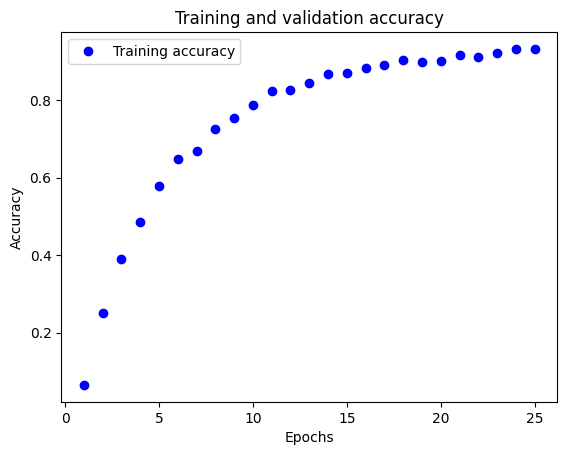

In [20]:
training_accuracy = model_fit.history['accuracy']
# validation_accuracy = model_fit.history['val_accuracy']

# Plotting accuracy
epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'bo', label='Training accuracy')
# plt.plot(epochs, validation_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()